In [21]:
import ast 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

Job count per job title!

In [22]:
df_title = df['job_title_short'].value_counts().to_frame()
df_title

,count
job_title_short,
Data Analyst,196075
Data Engineer,186241
Data Scientist,172286
Business Analyst,49063
Software Engineer,44929
Senior Data Engineer,44563
Senior Data Scientist,36957
Senior Data Analyst,29216
Machine Learning Engineer,14080


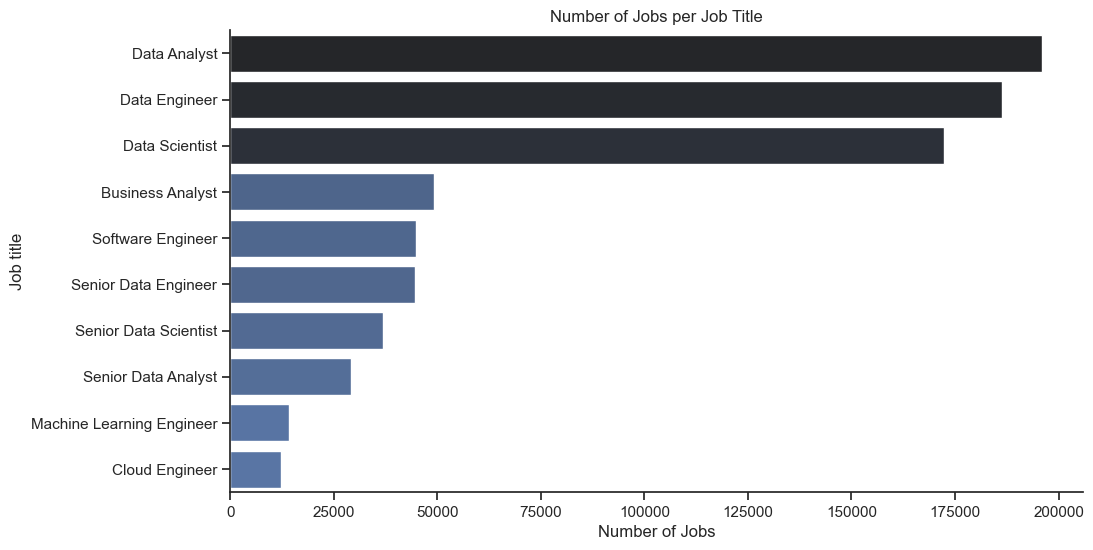

In [23]:
plt.figure(figsize=(11,6))
sns.set_theme(style='ticks')
sns.barplot(data=df_title, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('Job title')
plt.show()

Job count per country!

In [24]:
df_country = df['job_country'].value_counts().to_frame().head(15)
df_country

,count
job_country,
United States,206292
India,51088
United Kingdom,40375
France,39922
Germany,27694
Spain,25100
Singapore,23696
Sudan,21781
Netherlands,20631


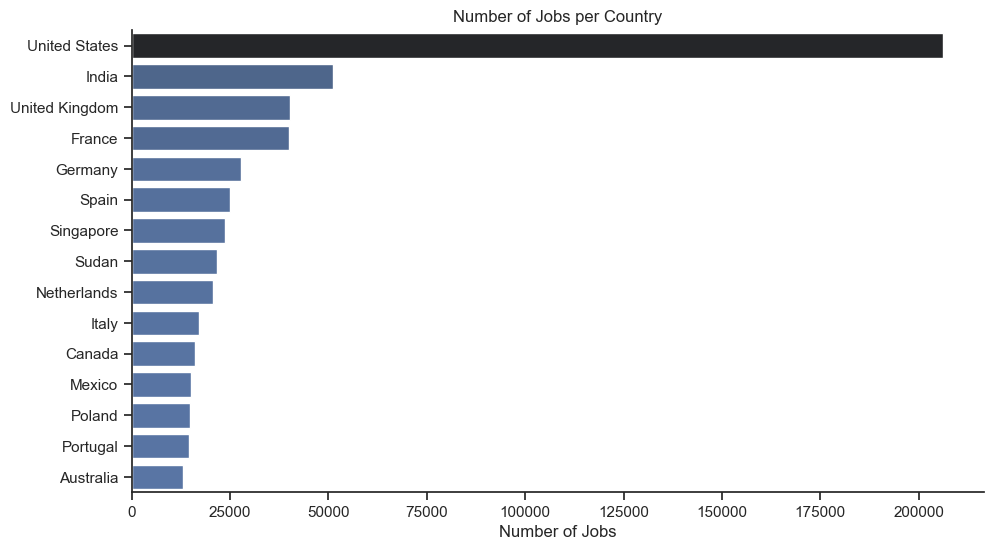

In [25]:
plt.figure(figsize=(11,6))
sns.set_theme(style='ticks')
sns.barplot(data=df_country, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()


plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

The number of Data Analyst jobs depends on the location in Poland

In [26]:
df_PL_DA = df[(df['job_country'] == 'Poland') & (df['job_title_short'] == 'Data Analyst')]
df_PL_DA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
584,Data Analyst,Data Quality Analyst,"Kraków, Poland",via LinkedIn,Full-time,False,Poland,2023-02-16 13:24:23,False,False,Poland,None,NaN,NaN,Dyson,"[sap, excel, word]","{'analyst_tools': ['sap', 'excel', 'word']}"
1263,Data Analyst,Data Analyst - Freelance - Portugal/UK/Poland,Poland,via My Stateline Jobs,Contractor,False,Poland,2023-06-29 14:03:32,True,False,Poland,None,NaN,NaN,Global Enterprise Partners,"[python, sql, r]","{'programming': ['python', 'sql', 'r']}"
1490,Data Analyst,HR Data Analyst,Poland,via Ai-Jobs.net,Full-time,False,Poland,2023-12-16 13:11:23,False,False,Poland,year,43200.0,NaN,Westinghouse Electric Company,"[gdpr, sap, powerpoint, excel]","{'analyst_tools': ['sap', 'powerpoint', 'excel..."
2269,Data Analyst,Analityk Danych (Data Analyst),"Warsaw, Poland",via The:Protocol,Full-time,False,Poland,2023-11-23 13:21:09,True,False,Poland,None,NaN,NaN,AASA POLSKA S.A.,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784713,Data Analyst,Data & Analytics Manager,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-04-25 06:23:30,True,False,Poland,None,NaN,NaN,NatWest Polska,[tableau],{'analyst_tools': ['tableau']}
785012,Data Analyst,CRM Data Analyst,Poland,via Adzuna.pl,Full-time,False,Poland,2023-01-14 06:21:29,False,False,Poland,None,NaN,NaN,Nestle,"[sql, sap, power bi, excel]","{'analyst_tools': ['sap', 'power bi', 'excel']..."
785052,Data Analyst,Analityk Big Data,"Kraków, Poland",via Trabajo.org,Full-time,False,Poland,2023-01-17 06:57:43,True,False,Poland,None,NaN,NaN,InPost,"[sql, python, databricks, snowflake, azure, sp...","{'cloud': ['databricks', 'snowflake', 'azure']..."
785474,Data Analyst,Sustainable Sourcing Data Analyst,"Warsaw, Poland",via Linkedin,Full-time,False,Poland,2023-01-04 15:44:44,True,False,Poland,None,NaN,NaN,Mars,"[sap, power bi]","{'analyst_tools': ['sap', 'power bi']}"


In [27]:
df_location = df_PL_DA['job_location'].value_counts().head(10).to_frame()
df_location

,count
job_location,
"Warsaw, Poland",1174
"Kraków, Poland",481
Anywhere,268
"Wrocław, Poland",236
Poland,213
"Gdańsk, Poland",160
"Poznań, Poland",136
"Łódź, Poland",116
"Katowice, Poland",56


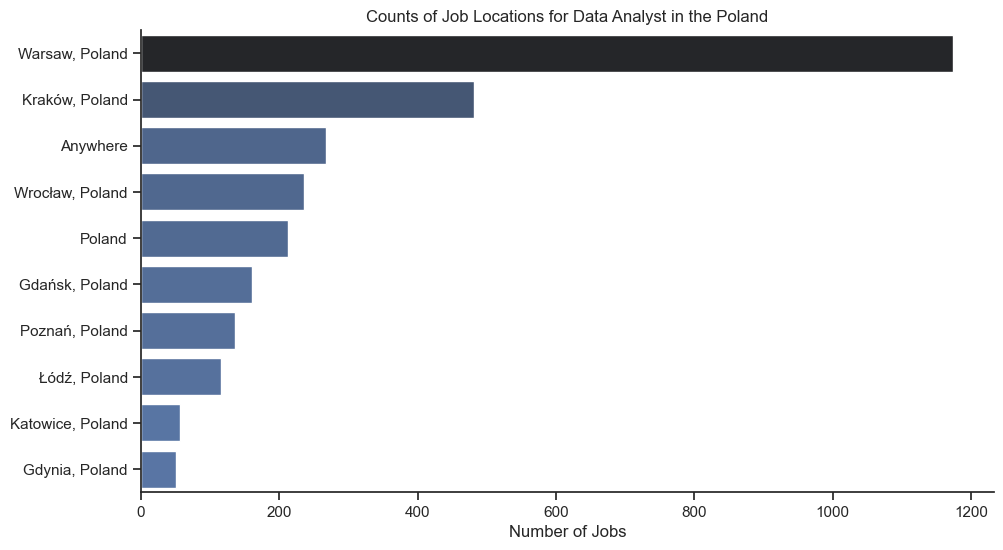

In [28]:
plt.figure(figsize=(11,6))
sns.set_theme(style='ticks')
sns.barplot(data=df_location, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Counts of Job Locations for Data Analyst in the Poland')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

The number of Data Analyst jobs depends on the company in Poland

In [29]:
df_company = df_PL_DA['company_name'].value_counts().head(10).to_frame()
df_company

,count
company_name,
Allegro,98
Citi,75
Accenture,68
L.M. GROUP POLAND Sp. z o.o.,65
UBS,36
Santander Bank Polska,35
ING,31
Scalo Sp. z o.o.,30
Relativity,29


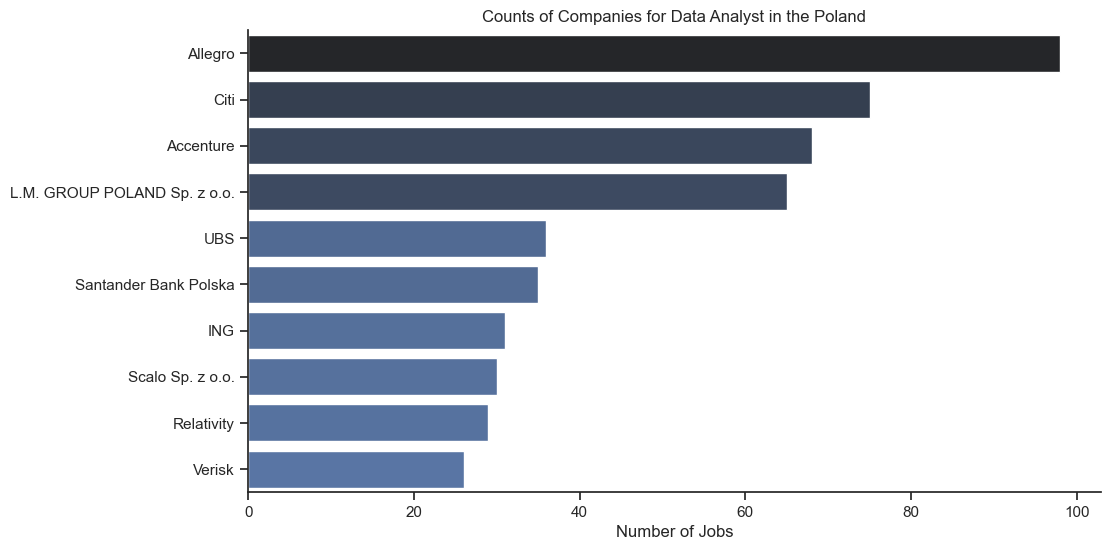

In [30]:
plt.figure(figsize=(11,6))
sns.set_theme(style='ticks')
sns.barplot(data=df_company, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()

plt.title('Counts of Companies for Data Analyst in the Poland')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()